<a href="https://colab.research.google.com/github/yungshan629/yungshan629/blob/main/FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finlab > log.txt
!pip install ta-lib-bin
import warnings


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

#warnings.filterwarnings("ignore")

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 改style要在改font之前tt5
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.8 MB/s eta 0:00:00
--2024-11-14 05:42:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.196.101, 74.125.196.113, 74.125.196.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-11-14 05:42:43--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re

In [2]:

!pip install pandas seaborn matplotlib openpyxl
!pip install pandas numpy matplotlib seaborn openpyxl
!pip install pandas numpy matplotlib seaborn scipy openpyxl

In [4]:
import pandas as pd
from google.colab import drive
file_path = '/content/drive/MyDrive/etfindex.xlsx'
df = pd.read_excel(file_path)
print("資料預覽：")
print(df.head())

資料預覽：
        time      SPX    QQQ    EWT    AGG    TLT     TIP    GLD  US_dollar
0 2006-03-28  1293.22  41.14  24.50  99.40  87.93  101.04  56.06      90.25
1 2006-03-29  1302.89  41.92  25.08  99.20  87.51  100.85  57.07      90.21
2 2006-03-30  1300.25  42.05  25.20  98.75  86.90  100.63  58.60      89.39
3 2006-03-31  1294.83  41.93  25.46  99.08  86.87  100.65  58.10      89.73
4 2006-04-03  1297.81  41.98  25.80  98.60  86.57  100.00  58.47      89.63


# heatmap


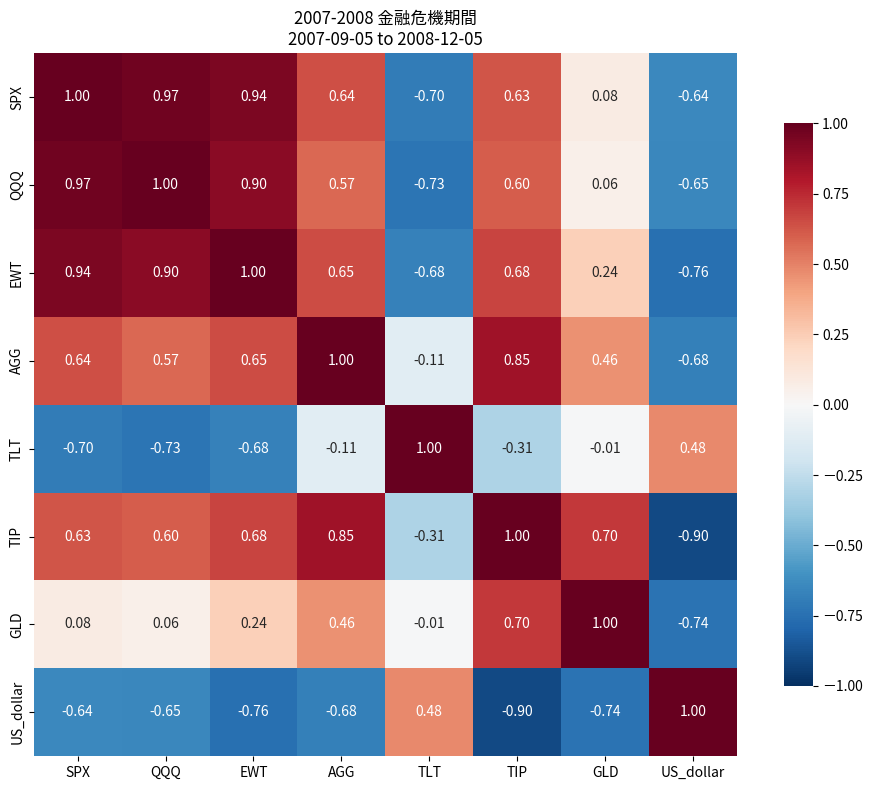

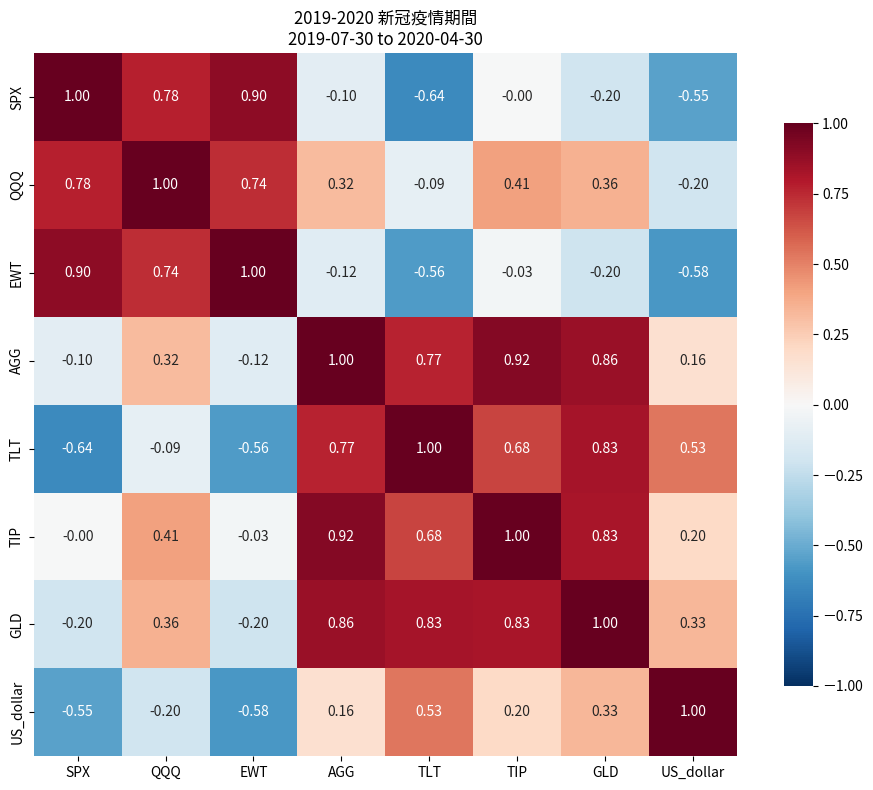

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def create_correlation_heatmap_for_period(data, start_date, end_date, title, figsize=(10, 8)):
    """
    為特定時間區間創建相關係數熱圖

    Parameters:
    data: DataFrame with datetime index
    start_date: str, 開始日期
    end_date: str, 結束日期
    title: str, 圖表標題
    figsize: tuple, 圖形大小
    """
    # 確保time列為日期格式
    if 'time' in data.columns:
        data = data.set_index('time')
    data.index = pd.to_datetime(data.index)

    # 選擇時間區間的數據
    period_data = data.loc[start_date:end_date]

    # 計算相關係數
    correlation_matrix = period_data.corr()

    # 創建圖形
    plt.figure(figsize=figsize)

    # 創建熱圖
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='RdBu_r',
                vmin=-1,
                vmax=1,
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={"shrink": .8})

    plt.title(f'{title}\n{start_date} to {end_date}')
    plt.tight_layout()
    return plt

# 讀取數據
# 假設數據已經是DataFrame格式，包含所有提到的列


# 定義要分析的兩個時間區間
periods = [
    {
        'start': '2007-09-05',
        'end': '2008-12-05',
        'title': '2007-2008 金融危機期間'
    },
    {
        'start': '2019-07-30',
        'end': '2020-04-30',
        'title': '2019-2020 新冠疫情期間'
    }
]

# 為每個時間區間創建熱圖
for period in periods:
    plt = create_correlation_heatmap_for_period(
        df,
        period['start'],
        period['end'],
        period['title']
    )
    plt.show()

# 計算基礎統計資料



Annual Return:
              2Y     5Y    10Y    30Y
1990-1992 0.0900 0.1050 0.1122 0.1097
2000-2003 0.0674 0.1020 0.1126 0.1280
2007-2008 0.0748 0.1256 0.1541 0.2727
2019-2020 0.0498 0.1035 0.1801 0.4152

Volatility:
              2Y     5Y    10Y    30Y
1990-1992 0.0171 0.0394 0.0587 0.0844
2000-2003 0.0221 0.0500 0.0796 0.1203
2007-2008 0.0303 0.0716 0.1034 0.1748
2019-2020 0.0149 0.0447 0.0982 0.2662

Sharpe Ratio:
              2Y     5Y    10Y    30Y
1990-1992 4.0958 2.1588 1.5709 1.0632
2000-2003 2.1500 1.6398 1.1632 0.8977
2007-2008 1.8115 1.4753 1.2967 1.4457
2019-2020 1.9965 1.8665 1.6309 1.4845

Max Drawdown:
               2Y      5Y     10Y     30Y
1990-1992 -0.0120 -0.0390 -0.0521 -0.0775
2000-2003 -0.0147 -0.0403 -0.0756 -0.1223
2007-2008 -0.0261 -0.0597 -0.0664 -0.0893
2019-2020 -0.0064 -0.0200 -0.0679 -0.1969


<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  plt.tight_layout()
<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  plt.tight_layout()
<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  plt.tight_layout()
<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 37228 (\N{CJK UNIFIED IDEOGRAPH-916C}) missing from current font.
  plt.tight_layout()
<ipython-input-9-666847ca5cf0>:109: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  plt.tight_layout()
<ipyth

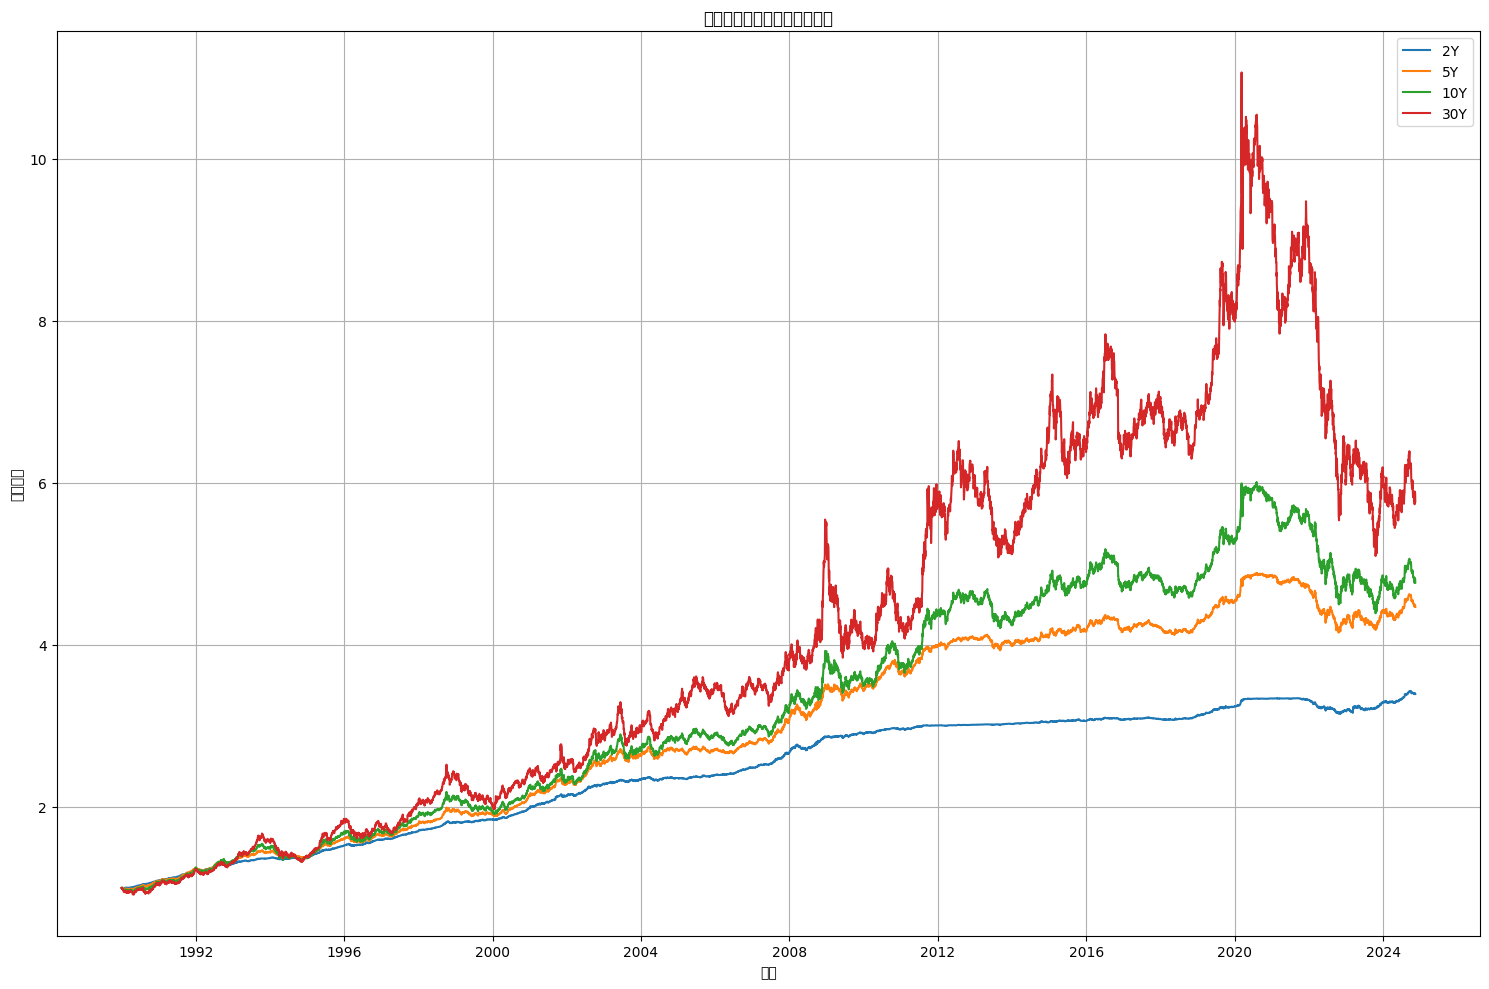

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

class BondAnalyzer:
    def __init__(self, df):
        df = df.copy()
        df.set_index(pd.to_datetime(df['Unnamed: 0']), inplace=True)
        df = df.drop('Unnamed: 0', axis=1)
        self.df = df

    def calculate_returns(self, start_date=None, end_date=None, period='D'):
        data = self.get_data_for_period(start_date, end_date)
        if period == 'D':
            returns = data.pct_change()
        elif period == 'M':
            returns = data.resample('M').last().pct_change()
        else:  # 'Y'
            returns = data.resample('Y').last().pct_change()
        return returns

    def get_data_for_period(self, start_date=None, end_date=None):
        if start_date is None and end_date is None:
            return self.df
        return self.df.loc[start_date:end_date]

    def calculate_volatility(self, start_date=None, end_date=None, period=252):
        returns = self.calculate_returns(start_date, end_date)
        volatility = returns.std() * np.sqrt(period)
        return volatility

    def calculate_sharpe_ratio(self, start_date=None, end_date=None, risk_free_rate=0.02, period=252):
        returns = self.calculate_returns(start_date, end_date)
        excess_returns = returns.mean() * period - risk_free_rate
        volatility = self.calculate_volatility(start_date, end_date, period)
        sharpe_ratio = excess_returns / volatility
        return sharpe_ratio

    def calculate_max_drawdown(self, start_date=None, end_date=None):
        returns = self.calculate_returns(start_date, end_date)
        cumulative = (1 + returns).cumprod()
        rolling_max = cumulative.expanding().max()
        drawdowns = cumulative / rolling_max - 1
        max_drawdowns = drawdowns.min()
        return max_drawdowns

# 讀取數據


# 創建分析器實例
analyzer = BondAnalyzer(df)

# 定義要分析的時間段
periods = [
    ('1990-06-22', '1992-11-15', '1990-1992'),
    ('2000-11-15', '2003-06-24', '2000-2003'),
    ('2007-09-05', '2008-12-05', '2007-2008'),
    ('2019-07-30', '2020-04-30', '2019-2020')
]

# 創建多層級的結果字典
results = {}
for start_date, end_date, period_name in periods:
    annual_returns = analyzer.calculate_returns(start_date, end_date).mean() * 252
    volatility = analyzer.calculate_volatility(start_date, end_date)
    sharpe = analyzer.calculate_sharpe_ratio(start_date, end_date)
    max_dd = analyzer.calculate_max_drawdown(start_date, end_date)

    results[period_name] = {
        'Annual Return': annual_returns,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_dd
    }

# 創建多層級DataFrame
df_results = {}
metrics = ['Annual Return', 'Volatility', 'Sharpe Ratio', 'Max Drawdown']

for metric in metrics:
    metric_data = {}
    for period in results:
        metric_data[period] = results[period][metric]
    df_results[metric] = pd.DataFrame(metric_data).T

# 設置顯示選項，確保完整顯示
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# 顯示每個指標的結果
for metric in metrics:
    print(f"\n{metric}:")
    print(df_results[metric])

# 繪製每個期限債券的累積報酬率
plt.figure(figsize=(15, 10))
returns = analyzer.calculate_returns()
for col in analyzer.df.columns:  # 2Y, 5Y, 10Y, 30Y
    cumulative_returns = (1 + returns[col]).cumprod()
    plt.plot(cumulative_returns, label=col)

plt.title('不同期限債券累積報酬率走勢')
plt.xlabel('日期')
plt.ylabel('累積報酬')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

原始數據前5行：
  Unnamed: 0       2Y       5Y      10Y      30Y
0 1990-01-01  115.873  119.683  124.128  129.643
1 1990-01-02  115.935  119.683  124.128  129.643
2 1990-01-03  115.850  119.372  123.692  129.128
3 1990-01-04  115.911  119.546  123.835  129.194
4 1990-01-05  115.972  119.534  123.746  128.873

各期間分析結果：
                                                       年化報酬率  \
1990-1992  2Y     0.089997
5Y     0.105039
10Y    0.11216...   
2000-2003  2Y     0.067438
5Y     0.101961
10Y    0.11259...   
2007-2008  2Y     0.074834
5Y     0.125618
10Y    0.15412...   
2019-2020  2Y     0.049803
5Y     0.103450
10Y    0.18008...   

                                                       年化波動率  \
1990-1992  2Y     0.017090
5Y     0.039392
10Y    0.05866...   
2000-2003  2Y     0.022064
5Y     0.049984
10Y    0.07960...   
2007-2008  2Y     0.030270
5Y     0.071589
10Y    0.10343...   
2019-2020  2Y     0.014927
5Y     0.044709
10Y    0.09816...   

                                             

<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  plt.tight_layout()
<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  plt.tight_layout()
<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  plt.tight_layout()
<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 37228 (\N{CJK UNIFIED IDEOGRAPH-916C}) missing from current font.
  plt.tight_layout()
<ipython-input-8-d78fa4465115>:103: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  plt.tight_layout()
<ipyth

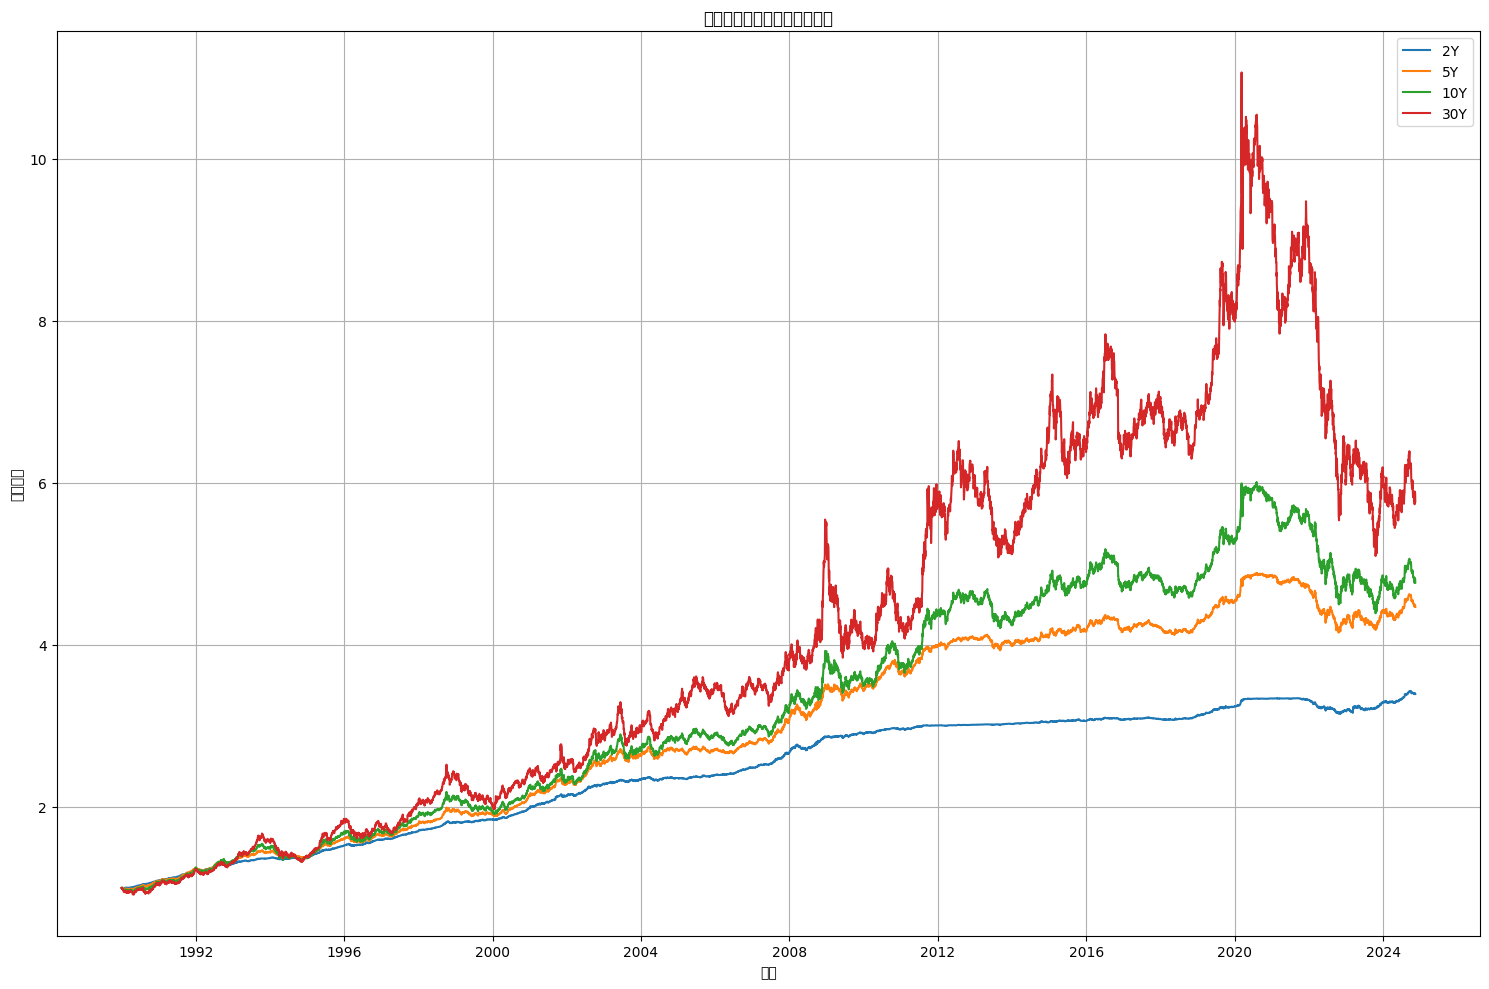

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime

class BondAnalyzer:
    def __init__(self, df):
        # 正確處理時間欄位
        df = df.copy()
        df.set_index(pd.to_datetime(df['Unnamed: 0']), inplace=True)
        df = df.drop('Unnamed: 0', axis=1)
        self.df = df

    def get_data_for_period(self, start_date=None, end_date=None):
        """獲取指定時間段的數據"""
        if start_date is None and end_date is None:
            return self.df
        return self.df.loc[start_date:end_date]

    def calculate_returns(self, start_date=None, end_date=None, period='D'):
        """計算指定時間段的報酬率"""
        data = self.get_data_for_period(start_date, end_date)
        if period == 'D':
            returns = data.pct_change()
        elif period == 'M':
            returns = data.resample('M').last().pct_change()
        else:  # 'Y'
            returns = data.resample('Y').last().pct_change()
        return returns

    def calculate_volatility(self, start_date=None, end_date=None, period=252):
        """計算指定時間段的年化波動率"""
        returns = self.calculate_returns(start_date, end_date)
        volatility = returns.std() * np.sqrt(period)
        return volatility

    def calculate_sharpe_ratio(self, start_date=None, end_date=None, risk_free_rate=0.02, period=252):
        """計算指定時間段的夏普指數"""
        returns = self.calculate_returns(start_date, end_date)
        excess_returns = returns.mean() * period - risk_free_rate
        volatility = self.calculate_volatility(start_date, end_date, period)
        sharpe_ratio = excess_returns / volatility
        return sharpe_ratio

    def calculate_max_drawdown(self, start_date=None, end_date=None):
        """計算指定時間段的最大回撤"""
        returns = self.calculate_returns(start_date, end_date)
        cumulative = (1 + returns).cumprod()
        rolling_max = cumulative.expanding().max()
        drawdowns = cumulative / rolling_max - 1
        max_drawdowns = drawdowns.min()
        return max_drawdowns

# 示範使用
# 讀取數據


# 印出前幾行確認數據格式
print("原始數據前5行：")
print(df.head())

# 創建分析器實例
analyzer = BondAnalyzer(df)

# 定義要分析的時間段
periods = [
    ('1990-06-22', '1992-11-15', '1990-1992'),
    ('2000-11-15', '2003-06-24', '2000-2003'),
    ('2007-09-05', '2008-12-05', '2007-2008'),
    ('2019-07-30', '2020-04-30', '2019-2020')
]

# 為每個時間段生成分析報告
results = {}
for start_date, end_date, period_name in periods:
    results[period_name] = {
        '年化報酬率': analyzer.calculate_returns(start_date, end_date).mean() * 252,
        '年化波動率': analyzer.calculate_volatility(start_date, end_date),
        '夏普指數': analyzer.calculate_sharpe_ratio(start_date, end_date),
        '最大回撤': analyzer.calculate_max_drawdown(start_date, end_date)
    }

# 轉換結果為DataFrame
summary = pd.DataFrame(results).T

# 顯示結果
print("\n各期間分析結果：")
print(summary)

# 繪製不同期限債券的累積報酬率走勢
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for col in analyzer.df.columns:  # 針對每個期限(2Y, 5Y, 10Y, 30Y)
    returns = analyzer.calculate_returns()
    cumulative_returns = (1 + returns[col]).cumprod()
    plt.plot(cumulative_returns, label=f'{col}')

plt.title('不同期限債券累積報酬率走勢')
plt.xlabel('日期')
plt.ylabel('累積報酬')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

class AssetAnalyzer:
    def __init__(self, file_path, start_date, end_date):
        """
        初始化分析器
        file_path: Excel文件路徑
        start_date: 降息開始日期
        end_date: 降息結束日期
        """
        self.data = pd.read_excel(file_path)
        self.start_date = start_date
        self.end_date = end_date

    def calculate_returns(self, data):
        """計算各種報酬率指標"""
        # 計算日報酬率
        daily_returns = data.pct_change()

        # 計算總報酬率
        total_return = (data.iloc[-1] / data.iloc[0] - 1) * 100

        # 計算年化報酬率
        days = len(data)
        annual_return = ((1 + total_return/100) ** (252/days) - 1) * 100

        # 計算波動率（年化）
        volatility = daily_returns.std() * np.sqrt(252) * 100

        # 計算最大回撤
        rolling_max = data.expanding().max()
        drawdown = (data - rolling_max) / rolling_max * 100
        max_drawdown = drawdown.min()

        # 計算夏普比率（假設無風險利率為2%）
        risk_free_rate = 0.02
        sharpe_ratio = (annual_return/100 - risk_free_rate) / (volatility/100)

        return {
            'total_return': total_return,
            'annual_return': annual_return,
            'volatility': volatility,
            'max_drawdown': max_drawdown,
            'sharpe_ratio': sharpe_ratio
        }

    def analyze_assets(self):
        """分析所有資產的表現"""
        # 過濾時間區間
        mask = (self.data['Date'] >= self.start_date) & (self.data['Date'] <= self.end_date)
        period_data = self.data.loc[mask].set_index('Date')

        # 儲存每個資產的分析結果
        results = {}
        for column in period_data.columns:
            results[column] = self.calculate_returns(period_data[column])

        return pd.DataFrame(results).T

    def plot_performance(self):
        """繪製資產表現圖表"""
        # 過濾時間區間
        mask = (self.data['Date'] >= self.start_date) & (self.data['Date'] <= self.end_date)
        period_data = self.data.loc[mask].set_index('Date')

        # 標準化價格（起始價格=100）
        normalized_data = period_data / period_data.iloc[0] * 100

        # 繪製價格走勢圖
        plt.figure(figsize=(15, 8))
        for column in normalized_data.columns:
            plt.plot(normalized_data.index, normalized_data[column], label=column)

        plt.title('降息期間資產表現比較', fontsize=14)
        plt.xlabel('日期')
        plt.ylabel('價格指數（基準=100）')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # 繪製相關性熱力圖
        plt.figure(figsize=(10, 8))
        correlation = period_data.pct_change().corr()
        sns.heatmap(correlation, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
        plt.title('資產相關性矩陣')
        plt.tight_layout()

def main():
    # 設定參數
    file_path = '你的Excel檔案路徑.xlsx'
    start_date = '2019-08-01'  # 降息開始日期
    end_date = '2020-03-15'    # 降息結束日期

    # 創建分析器
    analyzer = AssetAnalyzer(file_path, start_date, end_date)

    # 執行分析
    results = analyzer.analyze_assets()
    print("\n降息期間資產表現分析：")
    print(results)

    # 繪製圖表
    analyzer.plot_performance()
    plt.show()

if __name__ == "__main__":
    main()

Heatmap


<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from current font.
  plt.tight_layout()
<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 35211 (\N{CJK UNIFIED IDEOGRAPH-898B}) missing from current font.
  plt.tight_layout()
<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  plt.tight_layout()
<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from current font.
  plt.tight_layout()
<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  plt.tight_layout()
<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from current font.
  plt.tight_layout()
<ipython-input-1-e66a0f2730b0>:42: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
<ipython-inpu

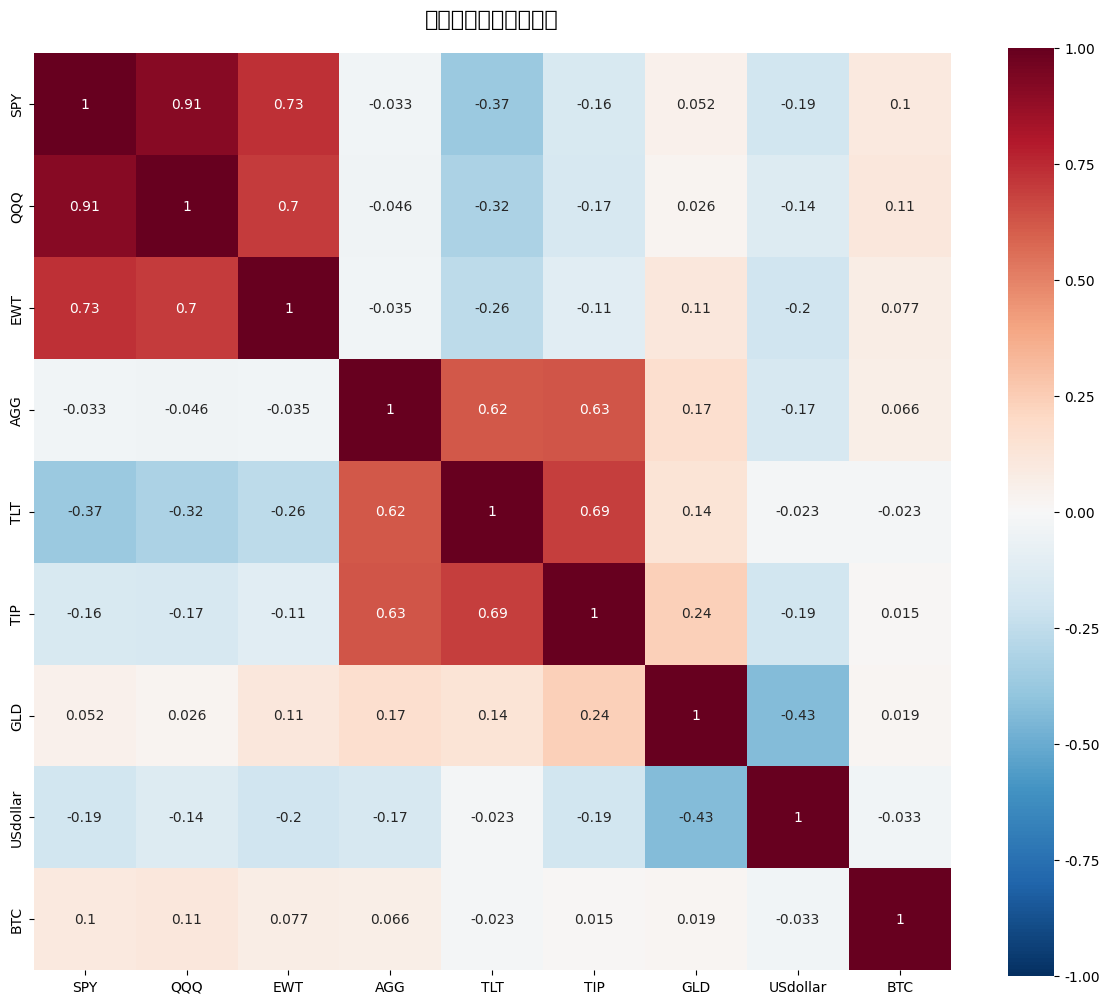

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def read_and_process_excel(file_path, sheet_name=0):
    """
    讀取Excel檔案並處理數據
    file_path: Excel檔案路徑
    sheet_name: 工作表名稱或索引（預設為第一個工作表）
    """
    # 讀取Excel檔案
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def create_correlation_heatmap(data):
    """
    創建相關性熱點圖
    """
    # 計算相關係數
    correlation = data.corr()

    # 設置中文字體
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False

    # 創建圖形
    plt.figure(figsize=(12, 10))

    # 繪製熱點圖
    sns.heatmap(correlation,
                annot=True,      # 顯示數值
                fmt='.3g',       # 數值格式（3位有效數字）
                cmap='RdBu_r',   # 使用紅藍色階
                center=0,        # 將顏色中心點設為0
                square=True,     # 確保每個單元格是正方形
                vmin=-1,         # 最小值
                vmax=1)          # 最大值

    # 設置標題
    plt.title('常見資產相關性熱點圖', fontsize=16, pad=20)

    # 調整佈局
    plt.tight_layout()

    return correlation

def main():
    # 設定Excel檔案路徑
    file_path = '你的Excel檔案路徑.xlsx'  # 請替換成你的檔案路徑

    # 讀取數據
    data = read_and_process_excel(file_path)

    # 計算相關係數並繪製熱點圖
    correlation = create_correlation_heatmap(data)

    # 顯示圖形
    plt.show()

    # 打印相關係數矩陣
    print("\n相關係數矩陣：")
    print(correlation)

    return correlation

if __name__ == "__main__":
    correlation = main()

YC
# 我要計算4個資產和標普500搭配的資產報酬率跟風險分散的效果


1990-1992 recession (1990-06-22 to 1992-11-15)
--------------------------------------------------------------------------------

SPX + 2Y Portfolio Metrics:
   Stock Weight  Bond Weight  Annual Return  Annual Volatility  Sharpe Ratio  Max Drawdown
0        30.00%       70.00%          9.05%              4.47%       157.69%        -4.99%
1        40.00%       60.00%          8.93%              5.74%       120.73%        -7.26%
2        50.00%       50.00%          8.81%              7.04%        96.75%        -9.47%
3        60.00%       40.00%          8.70%              8.36%        80.10%       -11.65%
4        70.00%       30.00%          8.58%              9.68%        67.90%       -13.78%

SPX + 5Y Portfolio Metrics:
   Stock Weight  Bond Weight  Annual Return  Annual Volatility  Sharpe Ratio  Max Drawdown
0        30.00%       70.00%         10.21%              5.56%       147.71%        -5.74%
1        40.00%       60.00%          9.92%              6.55%       120.96%        -

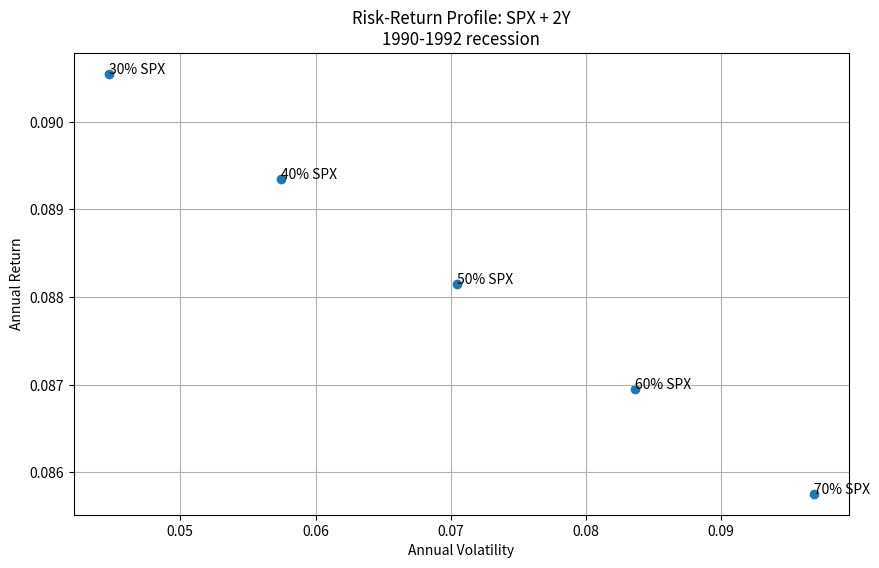

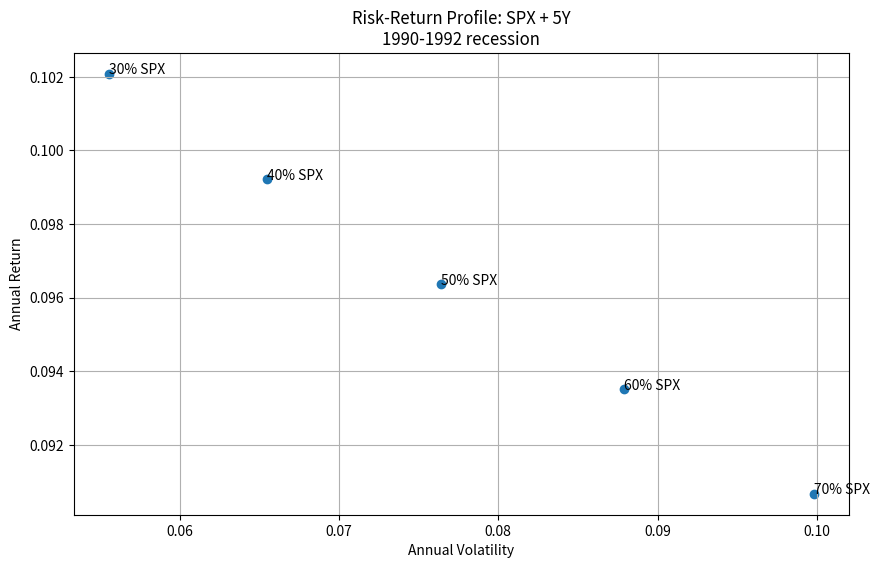

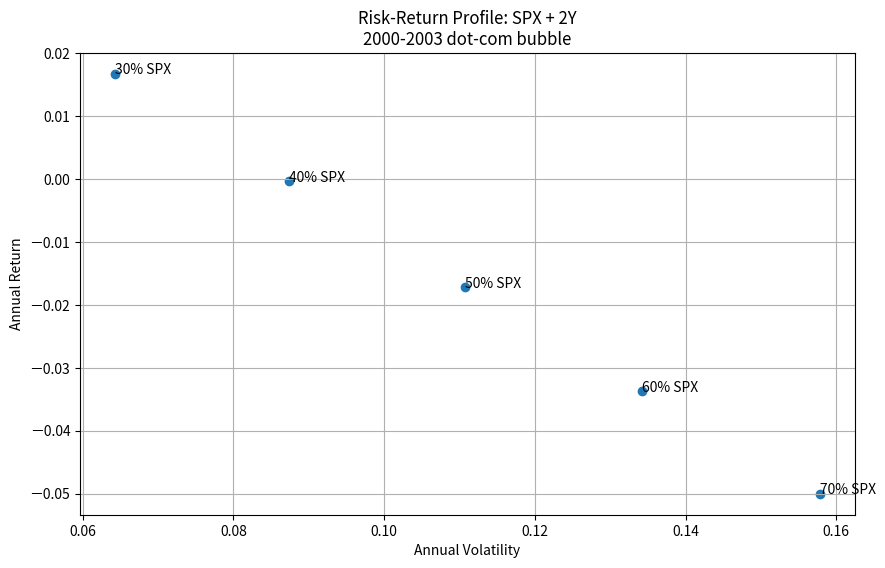

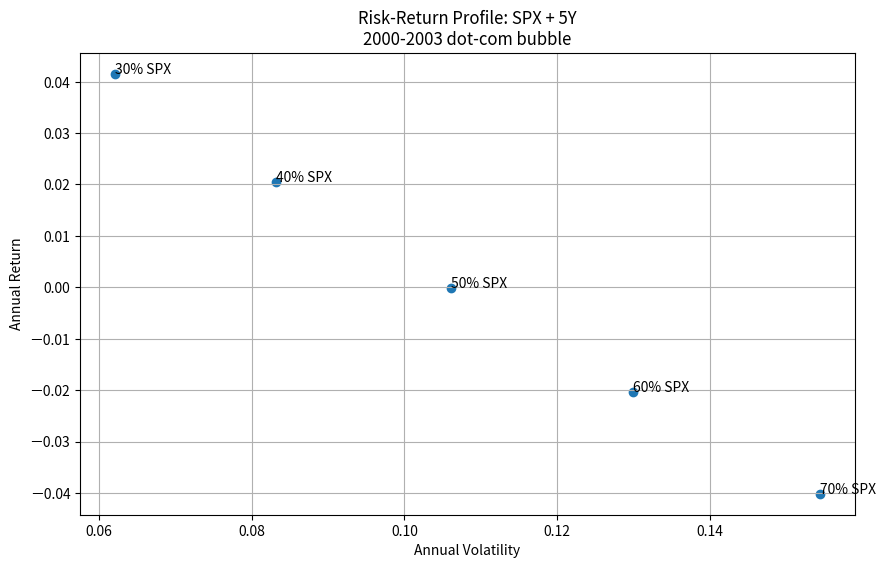

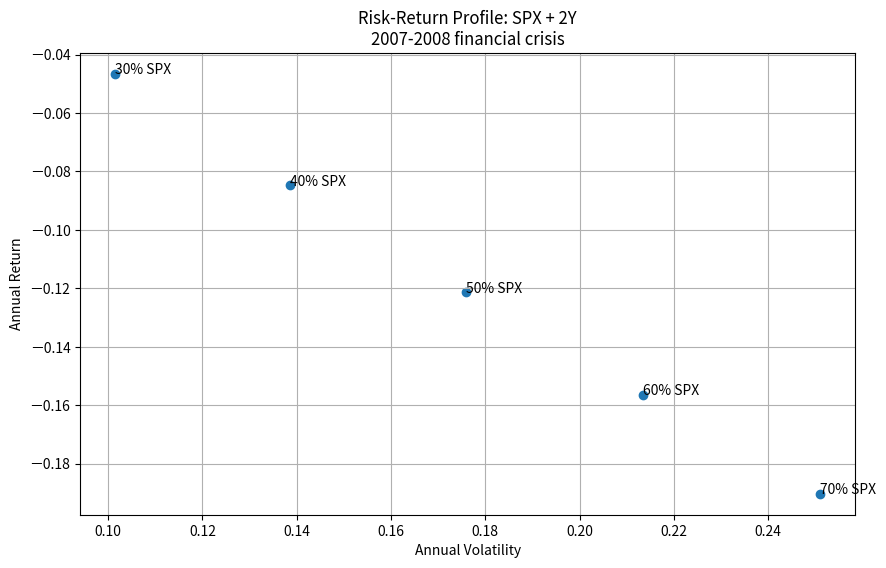

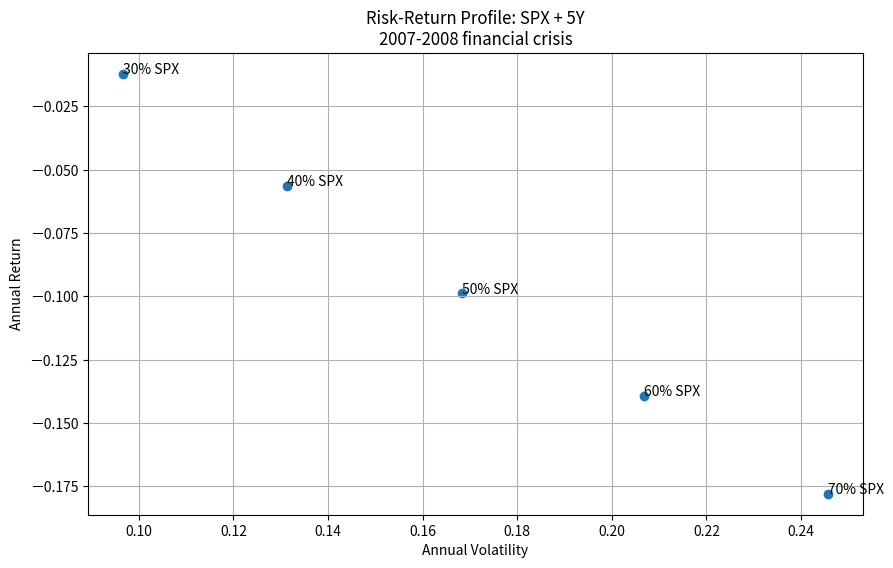

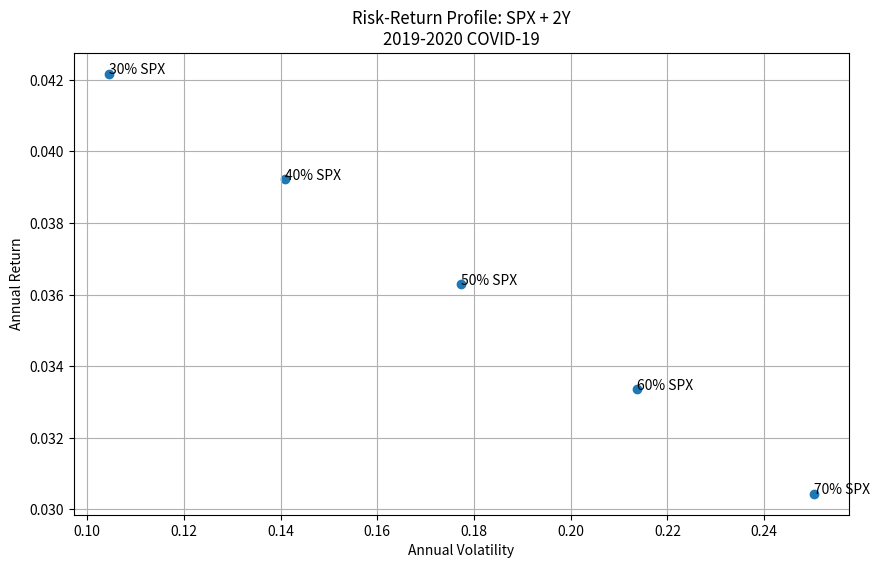

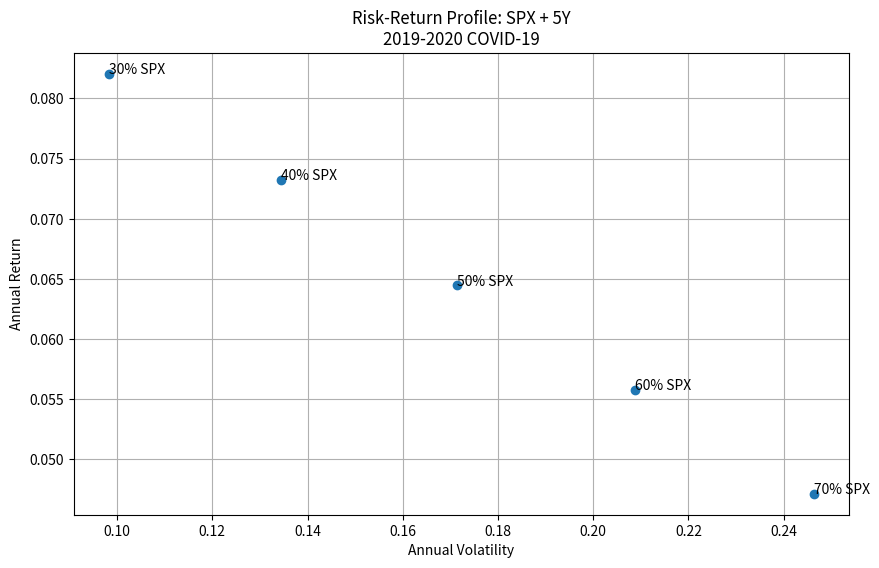

In [28]:
import pandas as pd
import numpy as np

def calculate_portfolio_metrics(data, start_date, end_date, stock_weights, bond_weights, risk_free_rate=0.02):
    """
    計算投資組合的各項指標

    Parameters:
    data: DataFrame with time index and asset prices
    start_date, end_date: 時間區間
    stock_weights: list of stock weights to try
    bond_weights: list of bond weights (2Y or 5Y)
    risk_free_rate: 無風險利率，預設2%
    """
    # 確保日期格式正確
    if 'time' in data.columns:
        data = data.set_index('time')
    data.index = pd.to_datetime(data.index)

    # 選擇時間區間
    period_data = data.loc[start_date:end_date].copy()

    # 計算日報酬率
    returns = period_data.pct_change().dropna()

    results = []

    for stock_weight in stock_weights:
        bond_weight = 1 - stock_weight

        # 計算投資組合報酬率
        portfolio_returns = (returns['SPX Index'] * stock_weight +
                           returns[bond_weights] * bond_weight)

        # 年化報酬率
        annual_return = (1 + portfolio_returns.mean()) ** 252 - 1

        # 年化波動率
        annual_volatility = portfolio_returns.std() * np.sqrt(252)

        # 夏普比率
        sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

        # 最大回撤
        cumulative_returns = (1 + portfolio_returns).cumprod()
        rolling_max = cumulative_returns.expanding().max()
        drawdowns = cumulative_returns / rolling_max - 1
        max_drawdown = drawdowns.min()

        results.append({
            'Stock Weight': stock_weight,
            'Bond Weight': bond_weight,
            'Annual Return': annual_return,
            'Annual Volatility': annual_volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown': max_drawdown
        })

    return pd.DataFrame(results)

# 定義時間區間
periods = [
    {
        'start': '1990-06-22',
        'end': '1992-11-15',
        'name': '1990-1992 recession'
    },
    {
        'start': '2000-11-15',
        'end': '2003-06-24',
        'name': '2000-2003 dot-com bubble'
    },
    {
        'start': '2007-09-05',
        'end': '2008-12-05',
        'name': '2007-2008 financial crisis'
    },
    {
        'start': '2019-07-30',
        'end': '2020-04-30',
        'name': '2019-2020 COVID-19'
    }
]

# 定義股債比例
stock_weights = [0.3, 0.4, 0.5, 0.6, 0.7]

# 分別計算SPX配2Y和5Y的結果
bonds = ['2Y', '5Y']

# 計算並顯示結果
for period in periods:
    print(f"\n{period['name']} ({period['start']} to {period['end']})")
    print("-" * 80)

    for bond in bonds:
        print(f"\nSPX + {bond} Portfolio Metrics:")
        results = calculate_portfolio_metrics(
            df,
            period['start'],
            period['end'],
            stock_weights,
            bond
        )

        # 格式化輸出
        pd.set_option('display.float_format', lambda x: '{:.2%}'.format(x))
        print(results)

def plot_efficient_frontier(results, period_name, bond_type):
    """
    繪製風險收益圖
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(results['Annual Volatility'], results['Annual Return'])

    # 添加標籤
    for i, row in results.iterrows():
        plt.annotate(f"{row['Stock Weight']:.0%} SPX",
                    (row['Annual Volatility'], row['Annual Return']))

    plt.xlabel('Annual Volatility')
    plt.ylabel('Annual Return')
    plt.title(f'Risk-Return Profile: SPX + {bond_type}\n{period_name}')
    plt.grid(True)
    return plt

# 為每個時期和債券類型繪製風險收益圖
for period in periods:
    for bond in bonds:
        results = calculate_portfolio_metrics(
            df,
            period['start'],
            period['end'],
            stock_weights,
            bond
        )
        plt = plot_efficient_frontier(results, period['name'], bond)
        plt.show()